In [17]:
import sys
sys.path.append('../')
from optimizer.optimizer import optimize
from generate_random_circuits.circuit_generator import random_circuit
from helper_functions.functions import flat_probs_to_matrix

n_qubits_list = [3, 5, 7] # numbers of qubits in a circuit
n_templates_list = [10 * i for i in range(1, 8)] # numbers of templates added to a random circuit

# define probabilities for optimizer
initial_probs = [1 for i in range(6)] # equal probability for all templates when first template is picked
flat_transition_probs = [1 for i in range(30)] # equal probability for all other templates and zero for current one. same template is never applied twice in a row.
transition_probs = flat_probs_to_matrix(flat_transition_probs) # optimizer takes probabilities in matrix form
# next step could be to find best initial and transition probabilities.
 
# initialize lists
circuits = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]
optimized_circuits = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]
circuit_lengths = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]
opt_circuit_lengths = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]

# create random circuits and optimize them
for i, n_qubits in enumerate(n_qubits_list):
    for j, n_templates in enumerate(n_templates_list):
        circuit = random_circuit(n_qubits, n_templates)
        optimized_circuit = optimize(circuit=circuit, initial_probs=initial_probs, transition_probs=transition_probs)
        circuits[i][j] = circuit
        optimized_circuits[i][j] = optimized_circuit
        circuit_lengths[i][j] = len(circuit)
        opt_circuit_lengths[i][j] = len(optimized_circuit)


Let's plot the ratios optimized_circuit_length / circuit_length to see how well the optimizer works with different qubit counts and circuit lenghts.

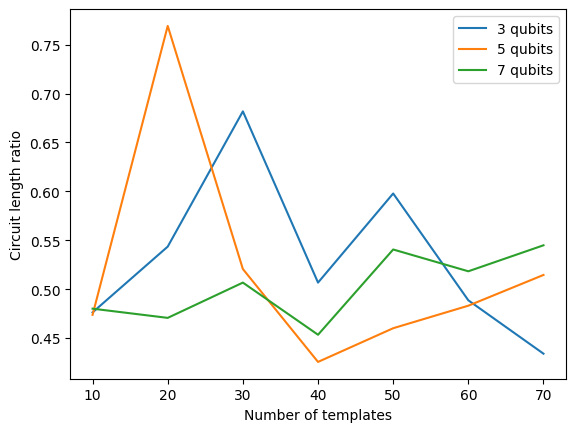

In [35]:
import matplotlib.pyplot as plt
import numpy as np

circuit_length_ratios = np.divide(np.array(opt_circuit_lengths), np.array(circuit_lengths))
for i in range(len(n_qubits_list)):
    label_string = str(n_qubits_list[i]) + " qubits"
    plt.plot(n_templates_list, circuit_length_ratios[i], label=label_string)

plt.xlabel('Number of templates')
plt.ylabel('Circuit length ratio')
plt.legend()
plt.show()


The ratios seem to oscillate quite a bit. Let's take the average of multiple cases for each qubit count and number of templates added to the random circuit.

In [22]:
n_circuits = 10 # amount of circuits created and optimized for each number of qubits and templates
average_circuit_length_ratios = [[None] * len(n_templates_list) for i in range(len(n_qubits_list))]

for i, n_qubits in enumerate(n_qubits_list):
    for j, n_templates in enumerate(n_templates_list):
        for k in range(n_circuits):
            circuit = random_circuit(n_qubits, n_templates)
            optimized_circuit = optimize(circuit=circuit, initial_probs=initial_probs, transition_probs=transition_probs)
            average_circuit_length_ratios[i][j] = len(optimized_circuit) / len(circuit)

In [23]:
print(average_circuit_length_ratios)

[[0.4, 0.5, 0.484375, 0.5116279069767442, 0.625, 0.37815126050420167, 0.4339622641509434], [0.41379310344827586, 0.4473684210526316, 0.4807692307692308, 0.5060240963855421, 0.49074074074074076, 0.5412844036697247, 0.4782608695652174], [0.391304347826087, 0.5102040816326531, 0.6075949367088608, 0.5543478260869565, 0.5576923076923077, 0.3793103448275862, 0.5109489051094891]]


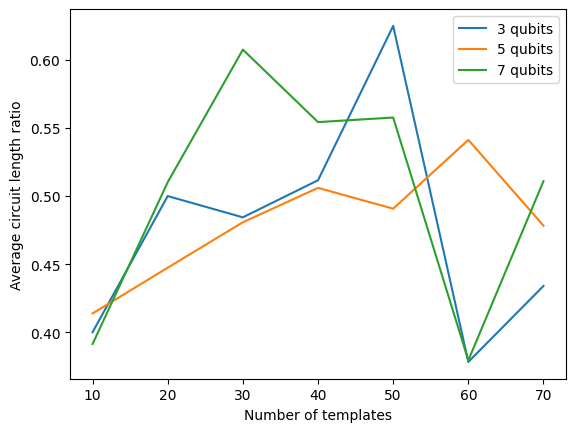

In [34]:
for i in range(len(n_qubits_list)):
    label_string = str(n_qubits_list[i]) + " qubits"
    plt.plot(n_templates_list, average_circuit_length_ratios[i], label=label_string)

plt.xlabel('Number of templates')
plt.ylabel('Average circuit length ratio')
plt.legend()
plt.show()

There still seems to be a lot of oscillation in the ratios. The important thing is that for each data point the ratio is less than 1 meaning that the optimizer makes the circuit shorter.